In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
df1 = pd.read_csv('/home/wahba/Documents/dataset/processed/2_cicids2017_benign_attack.csv')
df2 = pd.read_csv('/home/wahba/Documents/dataset/processed/3_cicids2017_attack_only.csv')
# Remove rows where 'Label' is 'Bot'
df2.drop(df2[df2['Label'] == 'Bot'].index, inplace=True)

print(df1['Label'].value_counts)
print(df2['Label'].value_counts)


<bound method IndexOpsMixin.value_counts of 0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
2522357    Benign
2522358    Benign
2522359    Benign
2522360    Benign
2522361    Benign
Name: Label, Length: 2522362, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         BruteForce
1         BruteForce
2         BruteForce
3         BruteForce
4         BruteForce
             ...    
425826           DoS
425827           DoS
425828           DoS
425829           DoS
425830           DoS
Name: Label, Length: 423878, dtype: object>


# 1.0 Binary Classification


    #################################
    #################################
                Packet Length Variance
    #################################
    #################################
    


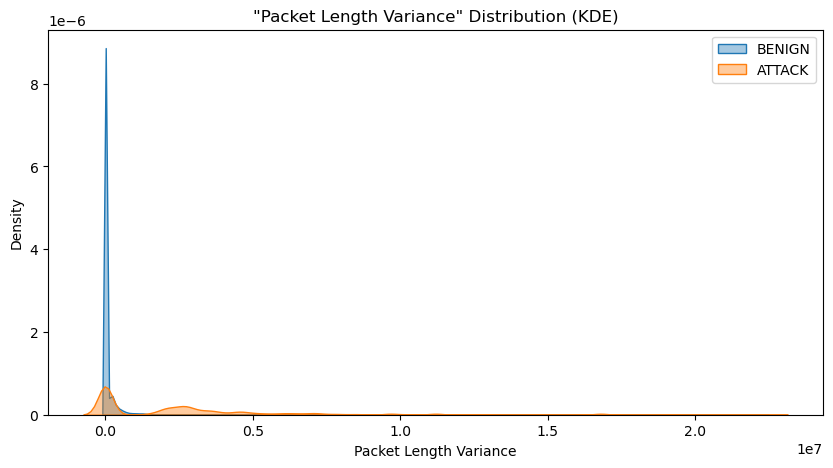

/tmp/ipykernel_16659/1953648870.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1,


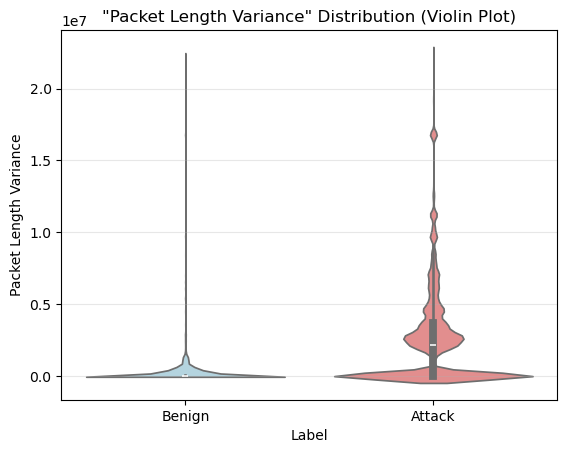


    #################################
    #################################
                Packet Length Std
    #################################
    #################################
    


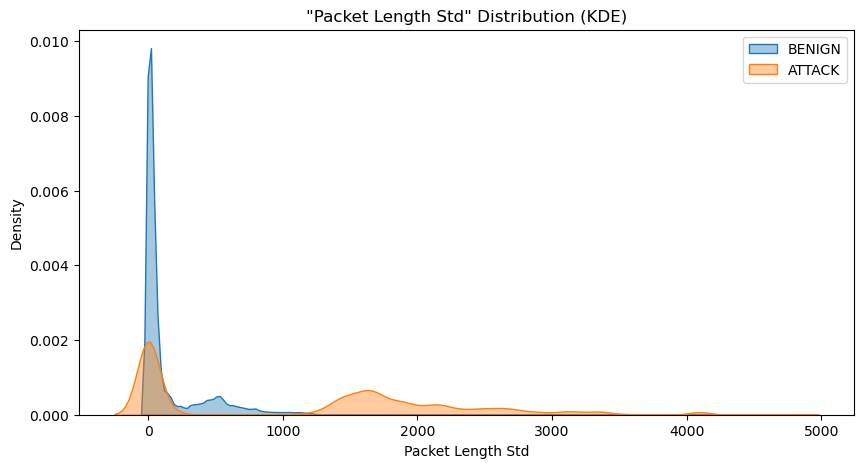

/tmp/ipykernel_16659/1953648870.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1,


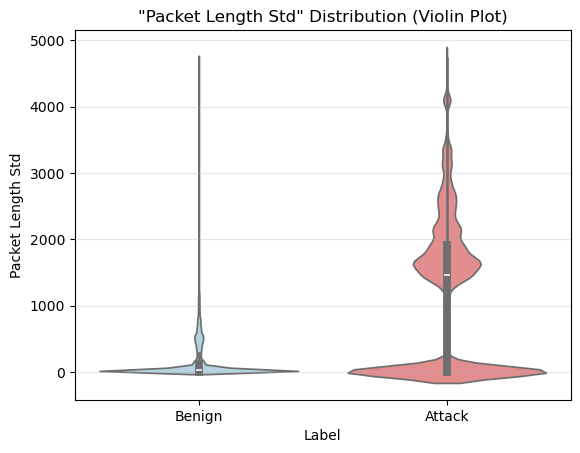


    #################################
    #################################
                Bwd Packet Length Std
    #################################
    #################################
    


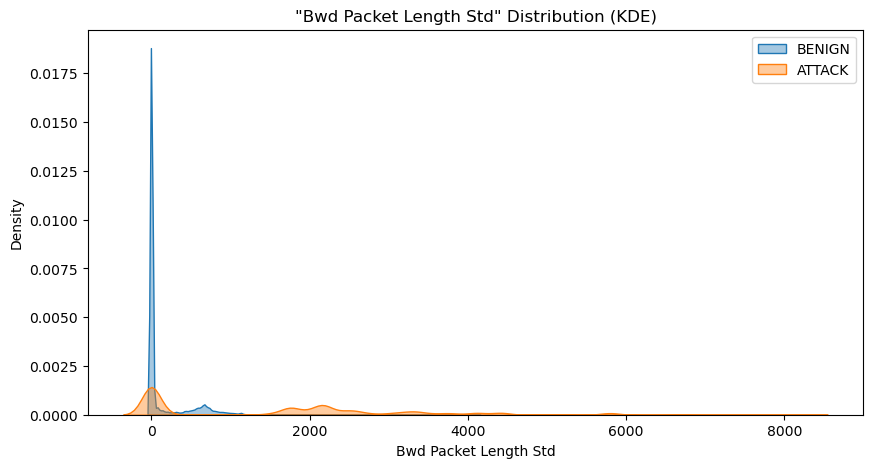

/tmp/ipykernel_16659/1953648870.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1,


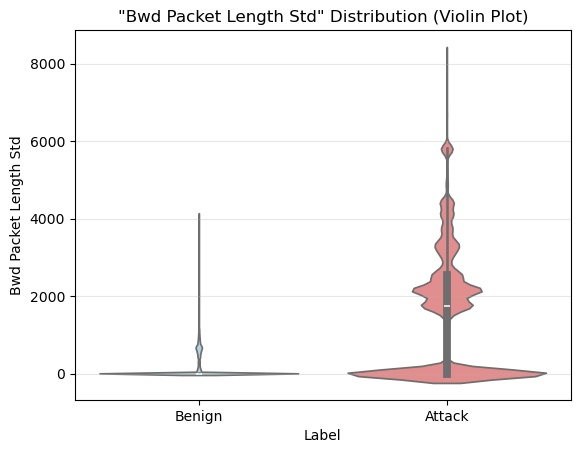

In [3]:
features = ['Packet Length Variance', 'Packet Length Std', 'Bwd Packet Length Std']

benign = df1[df1['Label'] == 'Benign']
attack = df1[df1['Label'] == 'Attack']

for feature in features:
    print(f'''
    #################################
    #################################
                {feature}
    #################################
    #################################
    ''')
    plt.figure(figsize=(10, 5))
    # KDE for BENIGN
    sns.kdeplot(
        benign[feature], 
        label='BENIGN', 
        fill=True,      # fill under the curve
        alpha=0.4
    )

    # KDE for ATTACK
    sns.kdeplot(
        attack[feature], 
        label='ATTACK', 
        fill=True,
        alpha=0.4
    )

    plt.title(f'"{feature}" Distribution (KDE)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    sns.violinplot(data=df1, 
               x='Label', 
               y=feature,
               palette=['lightblue', 'lightcoral'])
    plt.title(f'"{feature}" Distribution (Violin Plot)')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.3)
    plt.show()



# 2.0 Multi-class Classification


    #################################
    #################################
                Bwd Packets/s
    #################################
    #################################
    


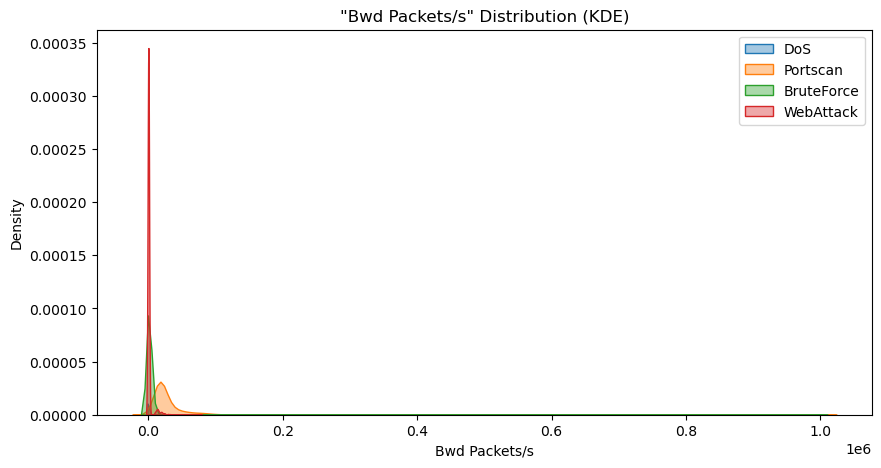

/tmp/ipykernel_13956/1111146684.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2,
/tmp/ipykernel_13956/1111146684.py:54: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df2,


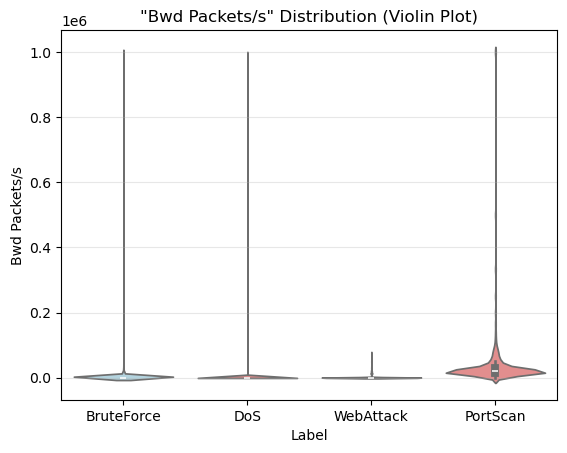


    #################################
    #################################
                Total Fwd Packets
    #################################
    #################################
    


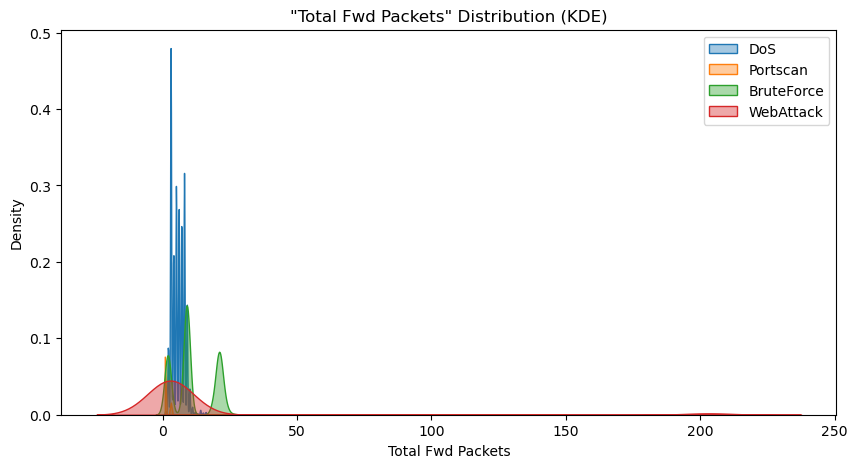

/tmp/ipykernel_13956/1111146684.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2,
/tmp/ipykernel_13956/1111146684.py:54: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df2,


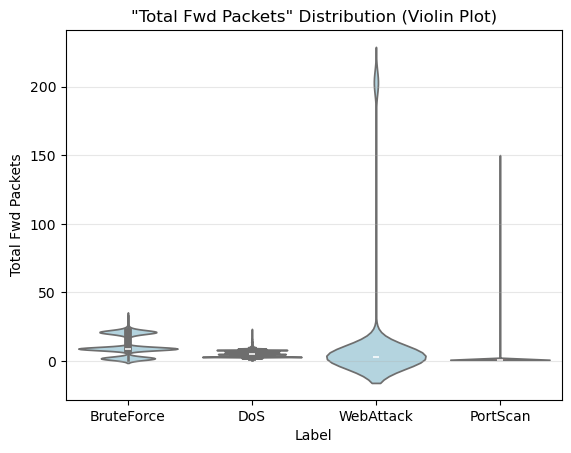


    #################################
    #################################
                Fwd IAT Total
    #################################
    #################################
    


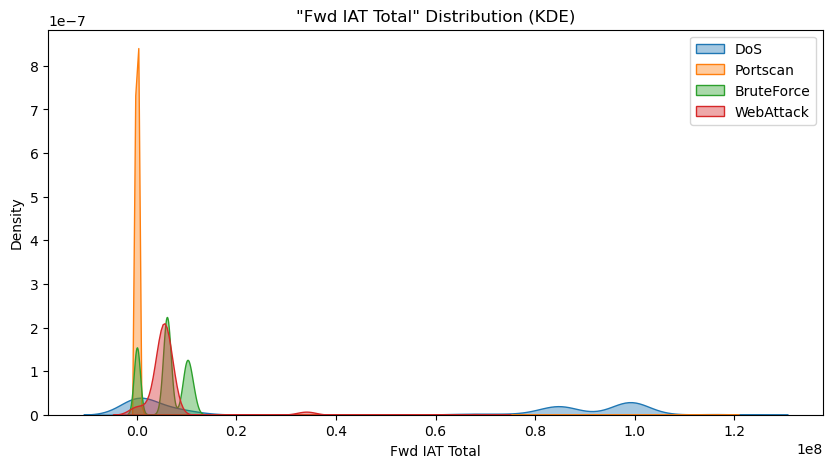

/tmp/ipykernel_13956/1111146684.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2,
/tmp/ipykernel_13956/1111146684.py:54: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df2,


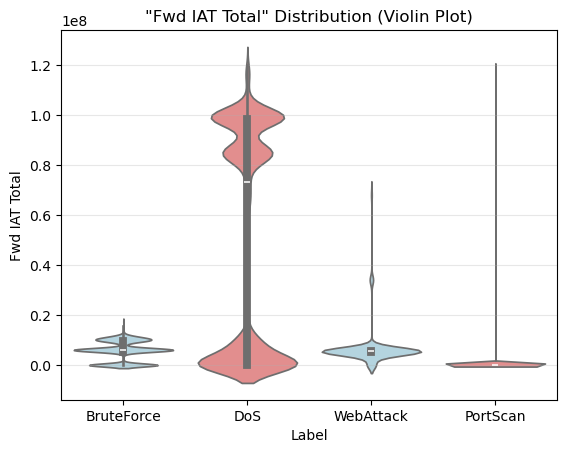


    #################################
    #################################
                Bwd Packet Length Std
    #################################
    #################################
    


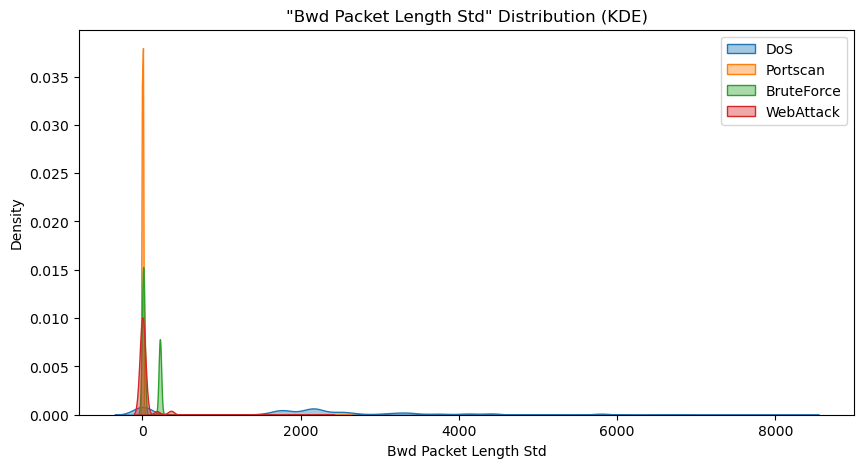

/tmp/ipykernel_13956/1111146684.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2,
/tmp/ipykernel_13956/1111146684.py:54: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df2,


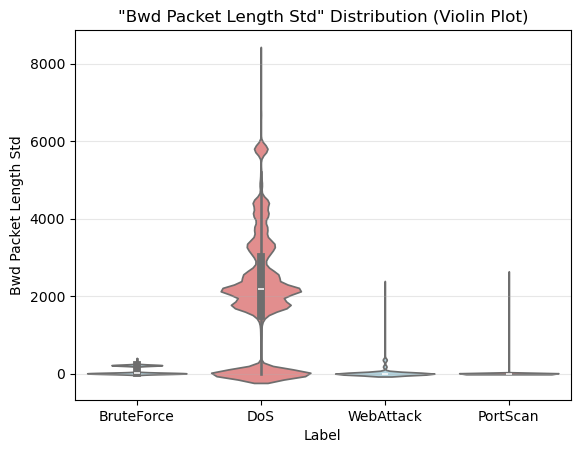


    #################################
    #################################
                Total Length of Fwd Packets
    #################################
    #################################
    


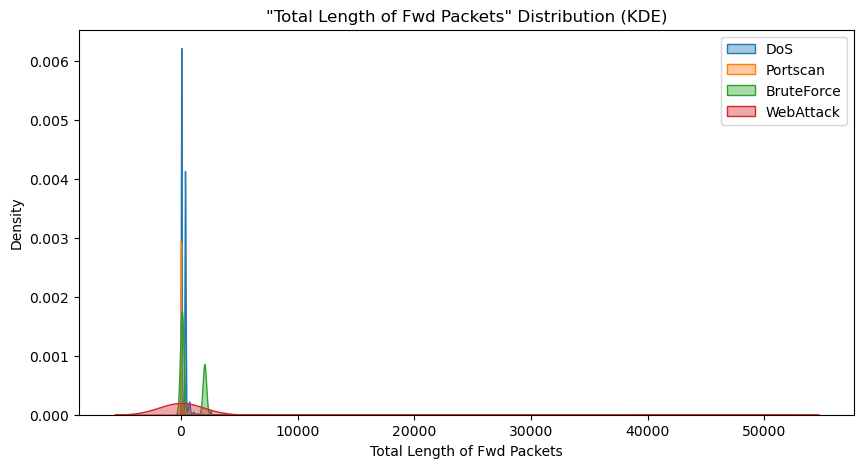

/tmp/ipykernel_13956/1111146684.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2,
/tmp/ipykernel_13956/1111146684.py:54: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df2,


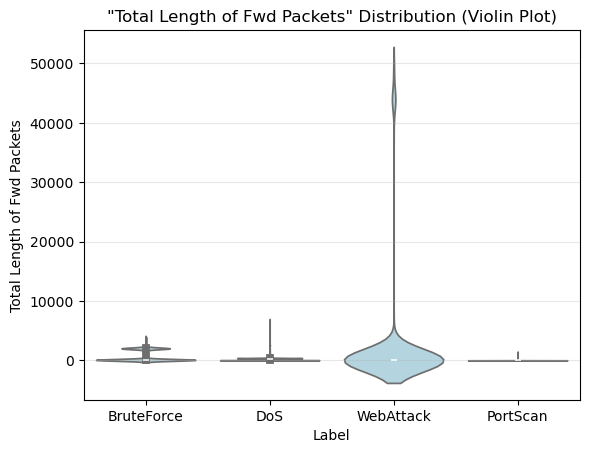

In [ ]:
DoS = df2[df2['Label'] == 'DoS']
Portscan = df2[df2['Label'] == 'PortScan']
BruteForce = df2[df2['Label'] == 'BruteForce']
WebAttack = df2[df2['Label'] == 'WebAttack']

features = ['Bwd Packets/s', 'Total Fwd Packets', 'Fwd IAT Total', 'Bwd Packet Length Std', 'Total Length of Fwd Packets']
label_order = ['DoS', 'PortScan', 'BruteForce', 'WebAttack']

for feature in features:
    print(f'''
    #################################
    #################################
                {feature}
    #################################
    #################################
    ''')
    plt.figure(figsize=(10, 5))
    # KDE for DoS
    sns.kdeplot(
        DoS[feature], 
        label='DoS', 
        fill=True,      # fill under the curve
        alpha=0.4
    )
    # KDE for Portscan
    sns.kdeplot(
        Portscan[feature], 
        label='Portscan', 
        fill=True,      # fill under the curve
        alpha=0.4
    )
    # KDE for BruteForce
    sns.kdeplot(
        BruteForce[feature], 
        label='BruteForce', 
        fill=True,      # fill under the curve
        alpha=0.4
    )
    # KDE for WebAttack
    sns.kdeplot(
        WebAttack[feature], 
        label='WebAttack', 
        fill=True,      # fill under the curve
        alpha=0.4
    )

    plt.title(f'"{feature}" Distribution (KDE)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()



    sns.violinplot(data=df2, 
            x='Label',
            order=label_order,
            y=feature,
            palette=['lightblue', 'lightcoral'])
    plt.title(f'"{feature}" Distribution (Violin Plot)')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.3)
    plt.show()